# Identifying Iris species

**Group members**

&emsp;&emsp;Erika Delorme, Arthur Lee, Rachel Lee, and Sharon Wang 

**Introduction**

[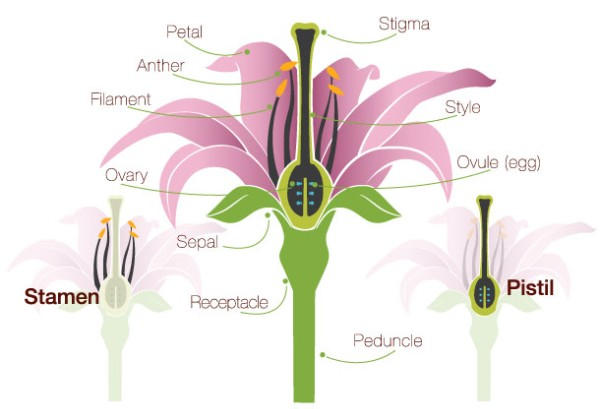](https://www.proflowers.com/blog/flower-anatomy)&emsp;&emsp;Irises are flowers that are generally blue or purple, with outstretched petals and sepals. Worldwide, the Iris genus contains approximately 300 species, from large bearded to dwarf irises. Sepals are the part of the flower that cover the outside of the bud and protects the flower before it blossoms. Petals are modified leaves that attract pollinators and protect reproductive organs.

**Question**

&emsp;&emsp;Given the sepal length, sepal width, petal length, and petal width, which species of Iris (Setosa, Versicolour, or Virginica) does the Iris plant belong to?

**Description**

&emsp;&emsp;The data set that we are using is the Iris Data Set from the UCI Machine Learning Repository. There are 3 types of Iris species being observed in this dataset: Iris Setosa, Iris Versicolor, and Iris Virginica. The four attributes of iris specie are the sepal length, sepal width, petal length, and petal width, all in cm. Using these four attributes, we believe we can predict the type of Iris species.

**Method**

In [25]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)

In [ ]:
set.seed(500)
iris=read_csv('data/iris.data')%>%
    mutate(class=as_factor(class))

iris_split <- initial_split(iris, prop = 0.75, strata = class)  
iris_train <- training(iris_split)   
iris_test <- testing(iris_split)

species_count <- iris_train %>% group_by(class) %>% summarize(count = n())

**Summarize our data**

|Species | Number of observations|
| --- | --- |
| Iris-setosa | 38 |
| Iris-versicolor | 38 |
| Iris-virginica | 38 |

**Visualize the data**

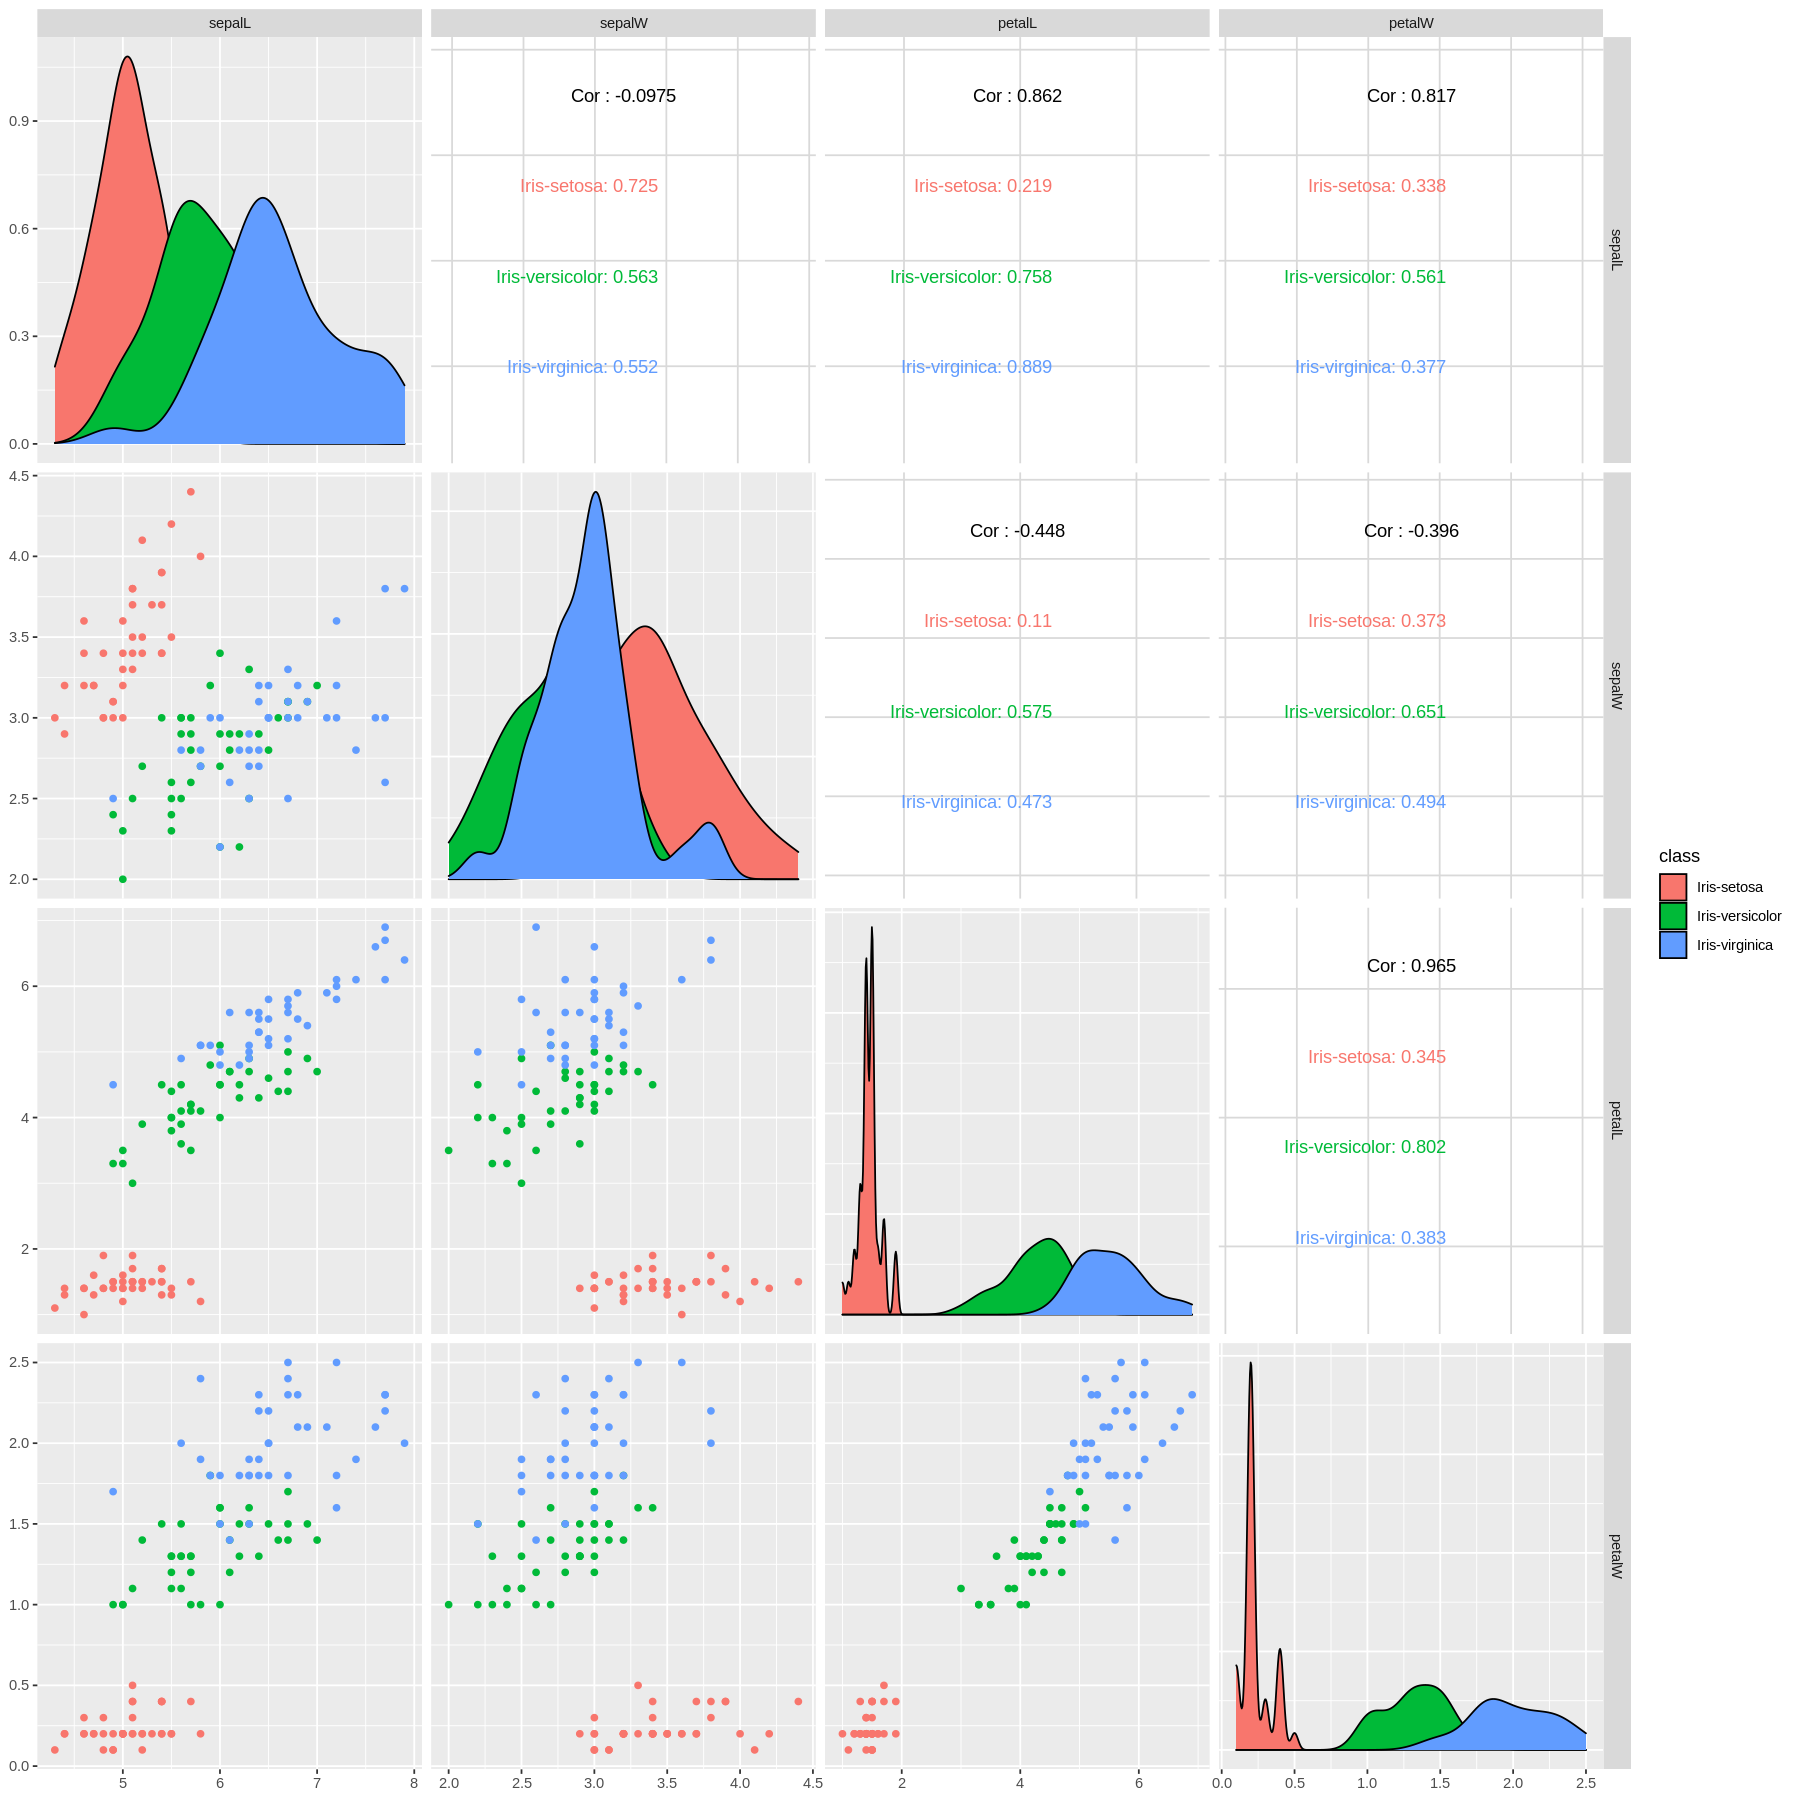

In [24]:
options(repr.plot.width = 15, repr.plot.height = 15)
iris_plot <- iris_train %>%
  ggpairs(legend = 1, columns = 1:4, mapping = ggplot2::aes(color = class))
iris_plot

**Discuss**

**Citations**

&emsp;&emsp;[Types of Irises. Fresh flower delivery.](https://www.growerdirect.com/types-of-irises#:~:text=The%20Iris%20genus%20contains%20over,bearded%20irises%20to%20dwarf%20irises)

&emsp;&emsp;[Wikimedia Foundation. (2021, March 2). Iris (plant). Wikipedia.](https://en.wikipedia.org/wiki/Iris_plant)